In [ ]:
#%%

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
MOVING = True # extra cleaner plot with moving-average of reward
if MOVING:
    from scipy.signal import savgol_filter

# hyper parameters
learning_rate = 0.1 #impacts how fast we update our estimates
discount_factor = 0.9 # gamma, impacts the return calculations
episodes = 4*1000 # number of episodes to learn, keep this a multiple of four for nice plotting 
T = 100  # Maximum steps in an episode
exploration_rate = 0.01  # Exploration rate
cost_of_living= - 0.01 # used when FrequentRewards = True, incentive the agent for efficiency by incurring a cost to each move 


# Choose environment
env = gym.make("FrozenLake8x8-v1", is_slippery=False)
FrequentRewards = False # when False the original environment rewards are used, if True the agent in incentivised to be efficient and avoid holes (how?)


Q = np.zeros([env.observation_space.n, env.action_space.n])
rewards_per_episode = []
q_values_at_intervals = []  # Store Q-values at intervals

for episode in range(episodes):
    state,prob = env.reset()
    total_reward = 0

    for step in range(T):
        # Choose action based on epsilon-greedy policy
        if np.random.rand() < exploration_rate:
            action = np.random.choice(env.action_space.n)
        else:
            action = np.argmax(Q[state, :])

        new_state, reward, terminated, truncated, info = env.step(action)

        if FrequentRewards:
            if terminated & (reward == 0):
                reward = reward - 1        
            
            reward = reward + cost_of_living

        # Update Q-value using Q-learning equation
        Q[state, action] += learning_rate * (reward + discount_factor * np.max(Q[new_state, :]) - Q[state, action])
        total_reward += reward
        state = new_state

        if terminated:
            if reward == 1+cost_of_living:
                print(f"Episode {episode} finished after {step+1} steps. Success!")
            break

    rewards_per_episode.append(total_reward)

    # Store Q-values at intervals (e.g., every 100 episodes)
    if (episode + 1) % (episodes//4) == 0:
        q_values_at_intervals.append(np.copy(Q))  # Store a copy of Q-values

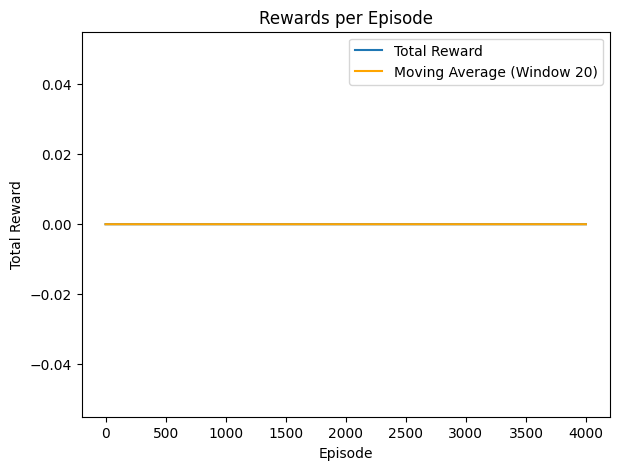

In [ ]:
#%%

# Plotting rewards per episode
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(rewards_per_episode, label='Total Reward')
plt.title('Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')

# the plot is too noisy, you can use the scipy package to calculate a moving average
if MOVING:
    moving_average_window = 20
    moving_averages = savgol_filter(rewards_per_episode, moving_average_window, 3)
    plt.plot(moving_averages, label=f'Moving Average (Window {moving_average_window})', color='orange')

plt.legend()

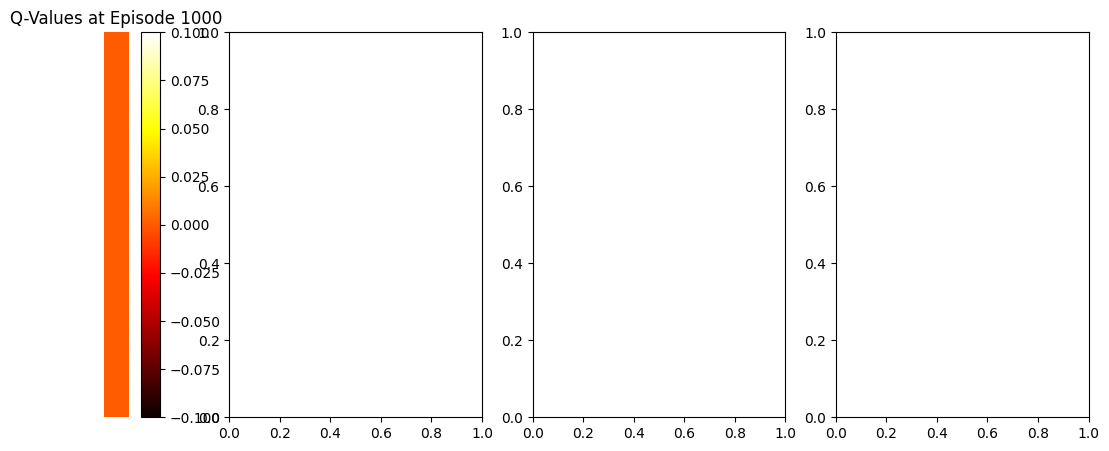

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
#%%

# Plotting the heatmap of Q-values at intervals
fig, ax = plt.subplots(1, len(q_values_at_intervals), figsize=(15, 5))

for i, q_values in enumerate(q_values_at_intervals):
    ax[i].imshow(q_values, cmap='hot', interpolation='nearest')
    ax[i].set_title(f'Q-Values at Episode {(episodes//4) * (i+1)}')
    ax[i].axis('off')  # Turn off axis
    plt.colorbar(ax[i].imshow(q_values, cmap='hot', interpolation='nearest'), ax=ax[i])
    plt.pause(0.1)  # Pause briefly to update the plot

In [ ]:
#%%

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
MOVING = True # extra cleaner plot with moving-average of reward
if MOVING:
    from scipy.signal import savgol_filter

# hyper parameters
learning_rate = 0.1 #impacts how fast we update our estimates
discount_factor = 0.9 # gamma, impacts the return calculations
episodes = 4*1000 # number of episodes to learn, keep this a multiple of four for nice plotting 
T = 100  # Maximum steps in an episode
exploration_rate = 0.01  # Exploration rate
cost_of_living= - 0.01 # used when FrequentRewards = True, incentive the agent for efficiency by incurring a cost to each move 


# Choose environment
env = gym.make("FrozenLake8x8-v1", is_slippery=True)
FrequentRewards = False # when False the original environment rewards are used, if True the agent in incentivised to be efficient and avoid holes (how?)


Q = np.zeros([env.observation_space.n, env.action_space.n])
rewards_per_episode = []
q_values_at_intervals = []  # Store Q-values at intervals

for episode in range(episodes):
    state,prob = env.reset()
    total_reward = 0

    for step in range(T):
        # Choose action based on epsilon-greedy policy
        if np.random.rand() < exploration_rate:
            action = np.random.choice(env.action_space.n)
        else:
            action = np.argmax(Q[state, :])

        new_state, reward, terminated, truncated, info = env.step(action)

        if FrequentRewards:
            if terminated & (reward == 0):
                reward = reward - 1        
            
            reward = reward + cost_of_living

        # Update Q-value using Q-learning equation
        Q[state, action] += learning_rate * (reward + discount_factor * np.max(Q[new_state, :]) - Q[state, action])
        total_reward += reward
        state = new_state

        if terminated:
            if reward == 1+cost_of_living:
                print(f"Episode {episode} finished after {step+1} steps. Success!")
            break

    rewards_per_episode.append(total_reward)

    # Store Q-values at intervals (e.g., every 100 episodes)
    if (episode + 1) % (episodes//4) == 0:
        q_values_at_intervals.append(np.copy(Q))  # Store a copy of Q-values

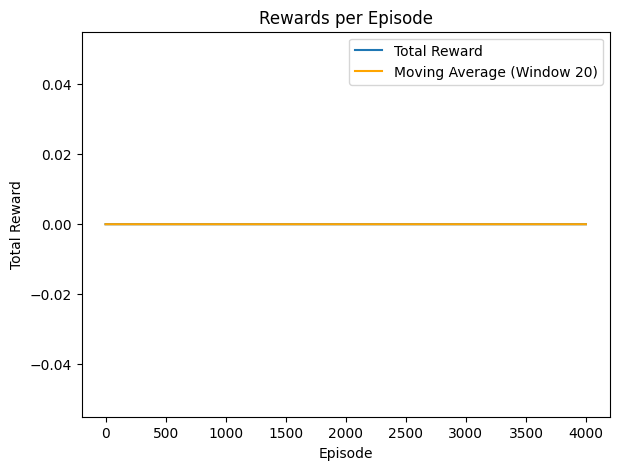

In [ ]:
#%%

# Plotting rewards per episode
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(rewards_per_episode, label='Total Reward')
plt.title('Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')

# the plot is too noisy, you can use the scipy package to calculate a moving average
if MOVING:
    moving_average_window = 20
    moving_averages = savgol_filter(rewards_per_episode, moving_average_window, 3)
    plt.plot(moving_averages, label=f'Moving Average (Window {moving_average_window})', color='orange')

plt.legend()

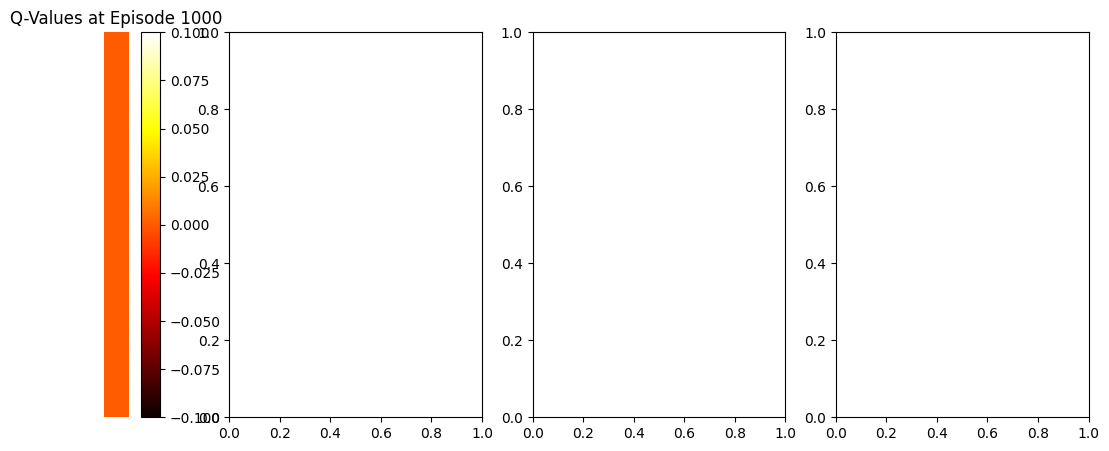

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
#%%

# Plotting the heatmap of Q-values at intervals
fig, ax = plt.subplots(1, len(q_values_at_intervals), figsize=(15, 5))

for i, q_values in enumerate(q_values_at_intervals):
    ax[i].imshow(q_values, cmap='hot', interpolation='nearest')
    ax[i].set_title(f'Q-Values at Episode {(episodes//4) * (i+1)}')
    ax[i].axis('off')  # Turn off axis
    plt.colorbar(ax[i].imshow(q_values, cmap='hot', interpolation='nearest'), ax=ax[i])
    plt.pause(0.1)  # Pause briefly to update the plot

 # Test 1
  
 - As we can see nothing is happening because the 'FrequentRewards' is false, therefore the agent has no incentive to actually move around.
 - Therefore our next option is to turn on the 'FrequentRewards' and see the agent will move. 
 - This also results in the Q-value always being zero as no learning is being done.

In [ ]:
#%%

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
MOVING = True # extra cleaner plot with moving-average of reward
if MOVING:
    from scipy.signal import savgol_filter

# hyper parameters
learning_rate = 0.1 #impacts how fast we update our estimates
discount_factor = 0.9 # gamma, impacts the return calculations
episodes = 4*1000 # number of episodes to learn, keep this a multiple of four for nice plotting 
T = 100  # Maximum steps in an episode
exploration_rate = 0.01  # Exploration rate
cost_of_living= - 0.01 # used when FrequentRewards = True, incentive the agent for efficiency by incurring a cost to each move 


# Choose environment
env = gym.make("FrozenLake8x8-v1", is_slippery=True)
FrequentRewards = True # when False the original environment rewards are used, if True the agent in incentivised to be efficient and avoid holes (how?)


Q = np.zeros([env.observation_space.n, env.action_space.n])
rewards_per_episode = []
q_values_at_intervals = []  # Store Q-values at intervals

for episode in range(episodes):
    state,prob = env.reset()
    total_reward = 0

    for step in range(T):
        # Choose action based on epsilon-greedy policy
        if np.random.rand() < exploration_rate:
            action = np.random.choice(env.action_space.n)
        else:
            action = np.argmax(Q[state, :])

        new_state, reward, terminated, truncated, info = env.step(action)

        if FrequentRewards:
            if terminated & (reward == 0):
                reward = reward - 1        
            
            reward = reward + cost_of_living

        # Update Q-value using Q-learning equation
        Q[state, action] += learning_rate * (reward + discount_factor * np.max(Q[new_state, :]) - Q[state, action])
        total_reward += reward
        state = new_state

        if terminated:
            if reward == 1+cost_of_living:
                print(f"Episode {episode} finished after {step+1} steps. Success!")
            break

    rewards_per_episode.append(total_reward)

    # Store Q-values at intervals (e.g., every 100 episodes)
    if (episode + 1) % (episodes//4) == 0:
        q_values_at_intervals.append(np.copy(Q))  # Store a copy of Q-values

Episode 75 finished after 36 steps. Success!
Episode 104 finished after 40 steps. Success!
Episode 114 finished after 94 steps. Success!
Episode 145 finished after 63 steps. Success!
Episode 153 finished after 89 steps. Success!
Episode 160 finished after 52 steps. Success!
Episode 175 finished after 66 steps. Success!
Episode 183 finished after 36 steps. Success!
Episode 193 finished after 63 steps. Success!
Episode 194 finished after 62 steps. Success!
Episode 203 finished after 52 steps. Success!
Episode 207 finished after 59 steps. Success!
Episode 213 finished after 45 steps. Success!
Episode 221 finished after 61 steps. Success!
Episode 224 finished after 87 steps. Success!
Episode 226 finished after 50 steps. Success!
Episode 240 finished after 90 steps. Success!
Episode 243 finished after 64 steps. Success!
Episode 252 finished after 49 steps. Success!
Episode 260 finished after 54 steps. Success!
Episode 272 finished after 29 steps. Success!
Episode 274 finished after 68 steps

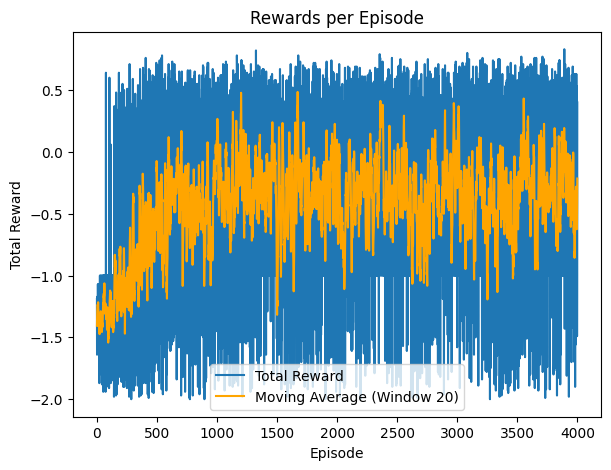

In [ ]:
#%%

# Plotting rewards per episode
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(rewards_per_episode, label='Total Reward')
plt.title('Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')

# the plot is too noisy, you can use the scipy package to calculate a moving average
if MOVING:
    moving_average_window = 20
    moving_averages = savgol_filter(rewards_per_episode, moving_average_window, 3)
    plt.plot(moving_averages, label=f'Moving Average (Window {moving_average_window})', color='orange')

plt.legend()

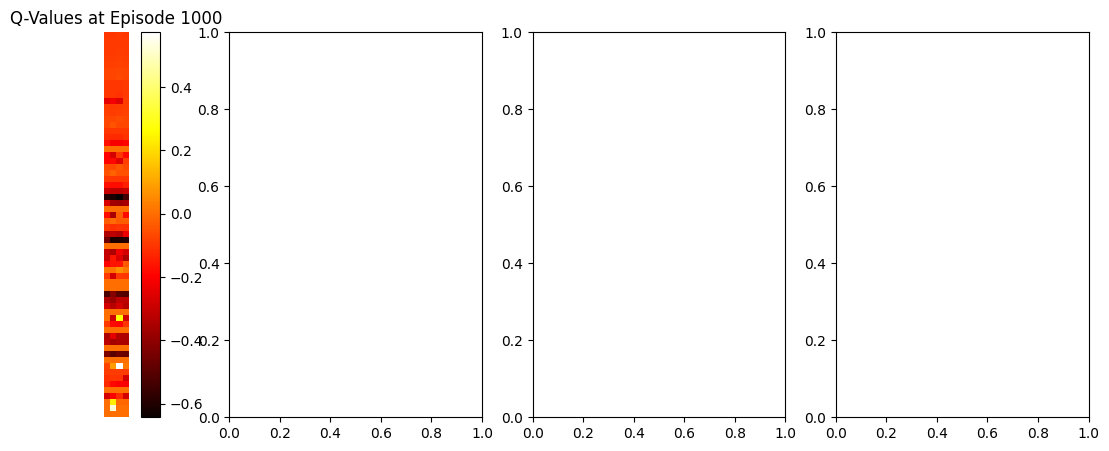

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
#%%

# Plotting the heatmap of Q-values at intervals
fig, ax = plt.subplots(1, len(q_values_at_intervals), figsize=(15, 5))

for i, q_values in enumerate(q_values_at_intervals):
    ax[i].imshow(q_values, cmap='hot', interpolation='nearest')
    ax[i].set_title(f'Q-Values at Episode {(episodes//4) * (i+1)}')
    ax[i].axis('off')  # Turn off axis
    plt.colorbar(ax[i].imshow(q_values, cmap='hot', interpolation='nearest'), ax=ax[i])
    plt.pause(0.1)  # Pause briefly to update the plot

 # Test 2

 - In the case here above 'is_slippery' is True and 'FrequentRewards' is also True, we can see that the agent has started moving. 
 - The Q table has also changed and we can see that it is actually learning, it now leans more towards to 0 and lower Q-values.
 - The learning is being "done" however it could be that either the agent has found the optimal route or that the parameters are not set optimal or the algorithm.

In [ ]:
#%%

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
MOVING = True # extra cleaner plot with moving-average of reward
if MOVING:
    from scipy.signal import savgol_filter

# hyper parameters
learning_rate = 0.1 #impacts how fast we update our estimates
discount_factor = 0.9 # gamma, impacts the return calculations
episodes = 4*1000 # number of episodes to learn, keep this a multiple of four for nice plotting 
T = 100  # Maximum steps in an episode
exploration_rate = 0.01  # Exploration rate
cost_of_living= - 0.01 # used when FrequentRewards = True, incentive the agent for efficiency by incurring a cost to each move 


# Choose environment
env = gym.make("FrozenLake8x8-v1", is_slippery=False)
FrequentRewards = True # when False the original environment rewards are used, if True the agent in incentivised to be efficient and avoid holes (how?)


Q = np.zeros([env.observation_space.n, env.action_space.n])
rewards_per_episode = []
q_values_at_intervals = []  # Store Q-values at intervals

for episode in range(episodes):
    state,prob = env.reset()
    total_reward = 0

    for step in range(T):
        # Choose action based on epsilon-greedy policy
        if np.random.rand() < exploration_rate:
            action = np.random.choice(env.action_space.n)
        else:
            action = np.argmax(Q[state, :])

        new_state, reward, terminated, truncated, info = env.step(action)

        if FrequentRewards:
            if terminated & (reward == 0):
                reward = reward - 1        
            
            reward = reward + cost_of_living

        # Update Q-value using Q-learning equation
        Q[state, action] += learning_rate * (reward + discount_factor * np.max(Q[new_state, :]) - Q[state, action])
        total_reward += reward
        state = new_state

        if terminated:
            if reward == 1+cost_of_living:
                print(f"Episode {episode} finished after {step+1} steps. Success!")
            break

    rewards_per_episode.append(total_reward)

    # Store Q-values at intervals (e.g., every 100 episodes)
    if (episode + 1) % (episodes//4) == 0:
        q_values_at_intervals.append(np.copy(Q))  # Store a copy of Q-values

Episode 40 finished after 47 steps. Success!
Episode 42 finished after 68 steps. Success!
Episode 45 finished after 35 steps. Success!
Episode 50 finished after 47 steps. Success!
Episode 51 finished after 83 steps. Success!
Episode 52 finished after 66 steps. Success!
Episode 53 finished after 43 steps. Success!
Episode 54 finished after 55 steps. Success!
Episode 55 finished after 77 steps. Success!
Episode 56 finished after 67 steps. Success!
Episode 58 finished after 60 steps. Success!
Episode 59 finished after 41 steps. Success!
Episode 60 finished after 55 steps. Success!
Episode 61 finished after 86 steps. Success!
Episode 62 finished after 70 steps. Success!
Episode 63 finished after 39 steps. Success!
Episode 64 finished after 29 steps. Success!
Episode 65 finished after 83 steps. Success!
Episode 66 finished after 69 steps. Success!
Episode 67 finished after 48 steps. Success!
Episode 68 finished after 61 steps. Success!
Episode 69 finished after 31 steps. Success!
Episode 70

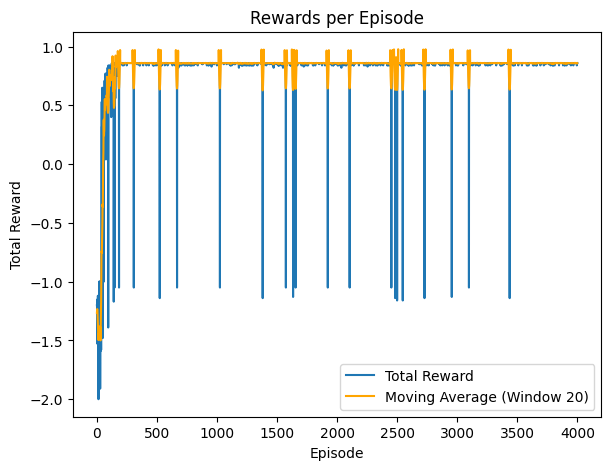

In [ ]:
#%%

# Plotting rewards per episode
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(rewards_per_episode, label='Total Reward')
plt.title('Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')

# the plot is too noisy, you can use the scipy package to calculate a moving average
if MOVING:
    moving_average_window = 20
    moving_averages = savgol_filter(rewards_per_episode, moving_average_window, 3)
    plt.plot(moving_averages, label=f'Moving Average (Window {moving_average_window})', color='orange')

plt.legend()

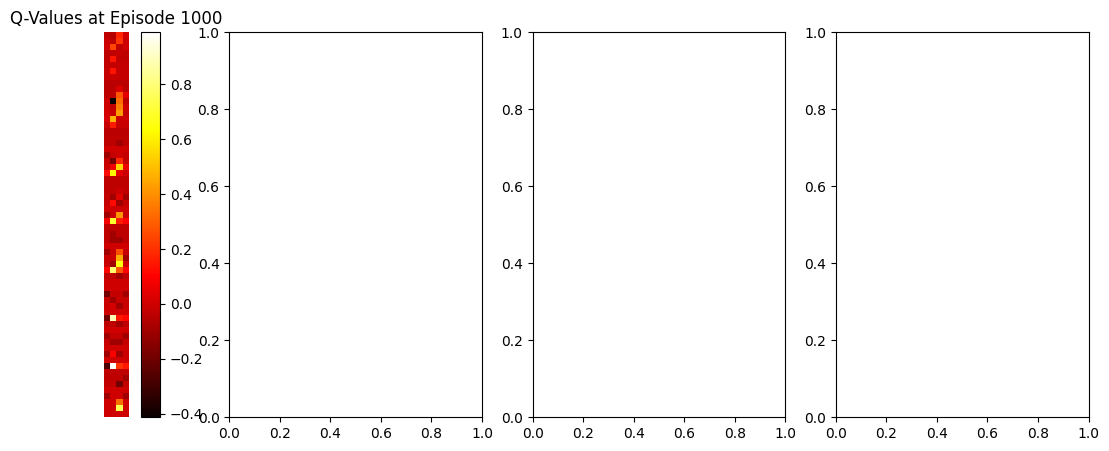

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
#%%

# Plotting the heatmap of Q-values at intervals
fig, ax = plt.subplots(1, len(q_values_at_intervals), figsize=(15, 5))

for i, q_values in enumerate(q_values_at_intervals):
    ax[i].imshow(q_values, cmap='hot', interpolation='nearest')
    ax[i].set_title(f'Q-Values at Episode {(episodes//4) * (i+1)}')
    ax[i].axis('off')  # Turn off axis
    plt.colorbar(ax[i].imshow(q_values, cmap='hot', interpolation='nearest'), ax=ax[i])
    plt.pause(0.1)  # Pause briefly to update the plot

 # Test 3

 - Now that 'is_slippery' is False, which means less unintented states (in other words less randomnes), results in a more efficient agent finding it's path.
 - The Q-table als closes more in to 0 again, as this means less unintented exploration.

In [ ]:
#%%

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
MOVING = True # extra cleaner plot with moving-average of reward
if MOVING:
    from scipy.signal import savgol_filter

# hyper parameters
learning_rate = 0.1 #impacts how fast we update our estimates
discount_factor = 0.9 # gamma, impacts the return calculations
episodes = 4*1000 # number of episodes to learn, keep this a multiple of four for nice plotting 
T = 100  # Maximum steps in an episode
exploration_rate = 0.5  # Exploration rate
cost_of_living= - 0.01 # used when FrequentRewards = True, incentive the agent for efficiency by incurring a cost to each move 


# Choose environment
env = gym.make("FrozenLake8x8-v1", is_slippery=False)
FrequentRewards = True # when False the original environment rewards are used, if True the agent in incentivised to be efficient and avoid holes (how?)


Q = np.zeros([env.observation_space.n, env.action_space.n])
rewards_per_episode = []
q_values_at_intervals = []  # Store Q-values at intervals

for episode in range(episodes):
    state,prob = env.reset()
    total_reward = 0

    for step in range(T):
        # Choose action based on epsilon-greedy policy
        if np.random.rand() < exploration_rate:
            action = np.random.choice(env.action_space.n)
        else:
            action = np.argmax(Q[state, :])

        new_state, reward, terminated, truncated, info = env.step(action)

        if FrequentRewards:
            if terminated & (reward == 0):
                reward = reward - 1        
            
            reward = reward + cost_of_living

        # Update Q-value using Q-learning equation
        Q[state, action] += learning_rate * (reward + discount_factor * np.max(Q[new_state, :]) - Q[state, action])
        total_reward += reward
        state = new_state

        if terminated:
            if reward == 1+cost_of_living:
                print(f"Episode {episode} finished after {step+1} steps. Success!")
            break

    rewards_per_episode.append(total_reward)

    # Store Q-values at intervals (e.g., every 100 episodes)
    if (episode + 1) % (episodes//4) == 0:
        q_values_at_intervals.append(np.copy(Q))  # Store a copy of Q-values

Episode 115 finished after 52 steps. Success!
Episode 169 finished after 42 steps. Success!
Episode 193 finished after 46 steps. Success!
Episode 195 finished after 28 steps. Success!
Episode 203 finished after 59 steps. Success!
Episode 205 finished after 51 steps. Success!
Episode 207 finished after 35 steps. Success!
Episode 213 finished after 16 steps. Success!
Episode 216 finished after 19 steps. Success!
Episode 245 finished after 22 steps. Success!
Episode 250 finished after 33 steps. Success!
Episode 253 finished after 39 steps. Success!
Episode 261 finished after 19 steps. Success!
Episode 264 finished after 19 steps. Success!
Episode 274 finished after 21 steps. Success!
Episode 281 finished after 25 steps. Success!
Episode 298 finished after 24 steps. Success!
Episode 301 finished after 17 steps. Success!
Episode 311 finished after 35 steps. Success!
Episode 313 finished after 28 steps. Success!
Episode 318 finished after 32 steps. Success!
Episode 322 finished after 41 step

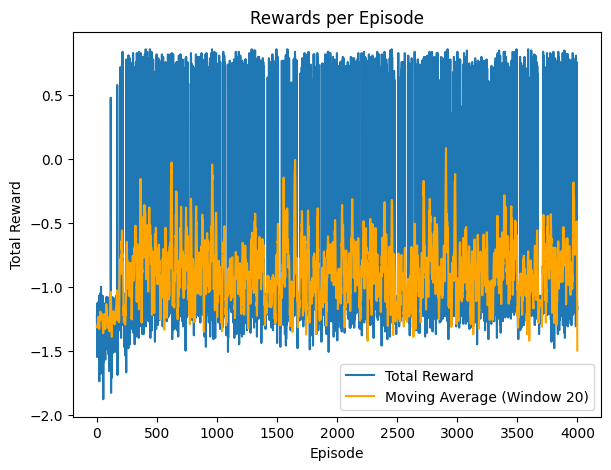

In [ ]:
#%%

# Plotting rewards per episode
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(rewards_per_episode, label='Total Reward')
plt.title('Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')

# the plot is too noisy, you can use the scipy package to calculate a moving average
if MOVING:
    moving_average_window = 20
    moving_averages = savgol_filter(rewards_per_episode, moving_average_window, 3)
    plt.plot(moving_averages, label=f'Moving Average (Window {moving_average_window})', color='orange')

plt.legend()

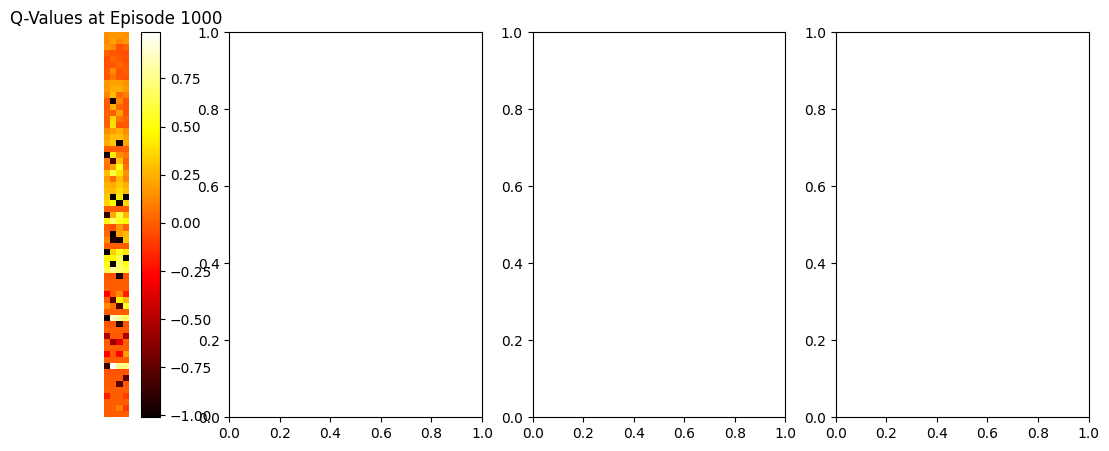

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
#%%

# Plotting the heatmap of Q-values at intervals
fig, ax = plt.subplots(1, len(q_values_at_intervals), figsize=(15, 5))

for i, q_values in enumerate(q_values_at_intervals):
    ax[i].imshow(q_values, cmap='hot', interpolation='nearest')
    ax[i].set_title(f'Q-Values at Episode {(episodes//4) * (i+1)}')
    ax[i].axis('off')  # Turn off axis
    plt.colorbar(ax[i].imshow(q_values, cmap='hot', interpolation='nearest'), ax=ax[i])
    plt.pause(0.1)  # Pause briefly to update the plot

 # Test 4
 - We can see the moving average goes down a lot compared to when 'is_slippery' is False, 'FrequentRewards' and the 'exploration_rate' was 0.01
 - This means we are yielding similair results with less moves, an improvement I would say.
 - The Q-Value are also more spread out which means that it found a lot of different steps at different states that are "the best move" for that state.

In [ ]:
#%%

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
MOVING = True # extra cleaner plot with moving-average of reward
if MOVING:
    from scipy.signal import savgol_filter

# hyper parameters
learning_rate = 0.1 #impacts how fast we update our estimates
discount_factor = 0.9 # gamma, impacts the return calculations
episodes = 4*1000 # number of episodes to learn, keep this a multiple of four for nice plotting 
T = 20  # Maximum steps in an episode
exploration_rate = 0.5  # Exploration rate
cost_of_living= - 0.01 # used when FrequentRewards = True, incentive the agent for efficiency by incurring a cost to each move 


# Choose environment
env = gym.make("FrozenLake8x8-v1", is_slippery=False)
FrequentRewards = True # when False the original environment rewards are used, if True the agent in incentivised to be efficient and avoid holes (how?)


Q = np.zeros([env.observation_space.n, env.action_space.n])
rewards_per_episode = []
q_values_at_intervals = []  # Store Q-values at intervals

for episode in range(episodes):
    state,prob = env.reset()
    total_reward = 0

    for step in range(T):
        # Choose action based on epsilon-greedy policy
        if np.random.rand() < exploration_rate:
            action = np.random.choice(env.action_space.n)
        else:
            action = np.argmax(Q[state, :])

        new_state, reward, terminated, truncated, info = env.step(action)

        if FrequentRewards:
            if terminated & (reward == 0):
                reward = reward - 1        
            
            reward = reward + cost_of_living

        # Update Q-value using Q-learning equation
        Q[state, action] += learning_rate * (reward + discount_factor * np.max(Q[new_state, :]) - Q[state, action])
        total_reward += reward
        state = new_state

        if terminated:
            if reward == 1+cost_of_living:
                print(f"Episode {episode} finished after {step+1} steps. Success!")
            break

    rewards_per_episode.append(total_reward)

    # Store Q-values at intervals (e.g., every 100 episodes)
    if (episode + 1) % (episodes//4) == 0:
        q_values_at_intervals.append(np.copy(Q))  # Store a copy of Q-values

Episode 533 finished after 20 steps. Success!
Episode 579 finished after 16 steps. Success!
Episode 587 finished after 18 steps. Success!
Episode 630 finished after 20 steps. Success!
Episode 641 finished after 16 steps. Success!
Episode 661 finished after 20 steps. Success!
Episode 696 finished after 19 steps. Success!
Episode 704 finished after 15 steps. Success!
Episode 732 finished after 20 steps. Success!
Episode 739 finished after 20 steps. Success!
Episode 765 finished after 18 steps. Success!
Episode 781 finished after 20 steps. Success!
Episode 806 finished after 19 steps. Success!
Episode 820 finished after 19 steps. Success!
Episode 828 finished after 19 steps. Success!
Episode 852 finished after 20 steps. Success!
Episode 858 finished after 16 steps. Success!
Episode 866 finished after 14 steps. Success!
Episode 877 finished after 19 steps. Success!
Episode 947 finished after 16 steps. Success!
Episode 965 finished after 17 steps. Success!
Episode 985 finished after 19 step

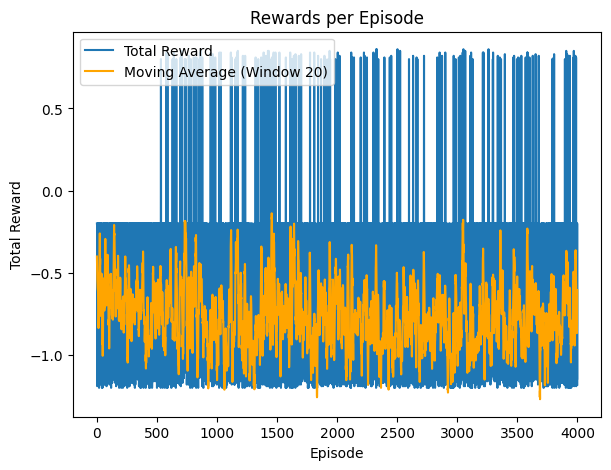

In [ ]:
#%%

# Plotting rewards per episode
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(rewards_per_episode, label='Total Reward')
plt.title('Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')

# the plot is too noisy, you can use the scipy package to calculate a moving average
if MOVING:
    moving_average_window = 20
    moving_averages = savgol_filter(rewards_per_episode, moving_average_window, 3)
    plt.plot(moving_averages, label=f'Moving Average (Window {moving_average_window})', color='orange')

plt.legend()

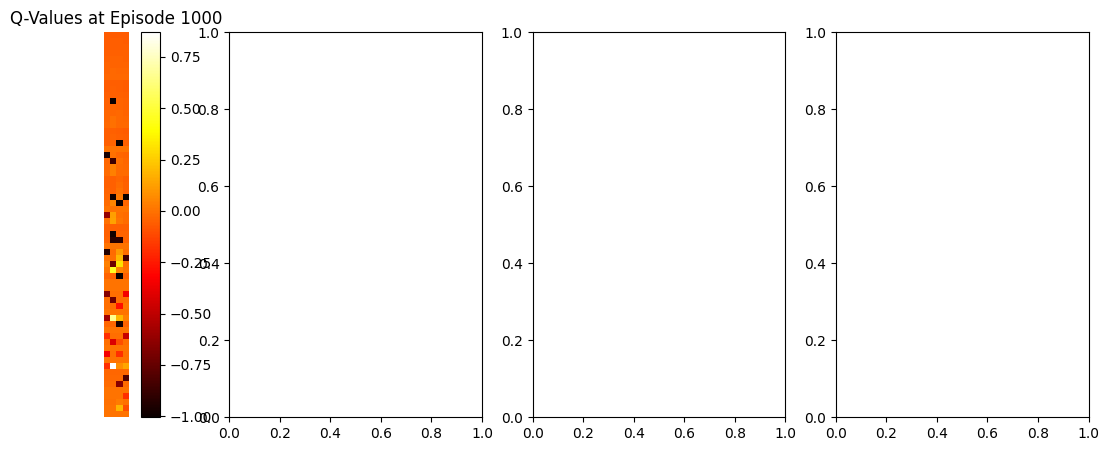

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
#%%

# Plotting the heatmap of Q-values at intervals
fig, ax = plt.subplots(1, len(q_values_at_intervals), figsize=(15, 5))

for i, q_values in enumerate(q_values_at_intervals):
    ax[i].imshow(q_values, cmap='hot', interpolation='nearest')
    ax[i].set_title(f'Q-Values at Episode {(episodes//4) * (i+1)}')
    ax[i].axis('off')  # Turn off axis
    plt.colorbar(ax[i].imshow(q_values, cmap='hot', interpolation='nearest'), ax=ax[i])
    plt.pause(0.1)  # Pause briefly to update the plot

 # Test 5
 - We can see a decrease in rewards, decrease in average moving which makes sense as the max allowed moves are lowered overall. 
 - This results in an agent that explores less and the Q values closer in to 0 again.

 # Rare events and exploration methods

 - RARE EVENTS
 - If important events are rare and used only once, learning from them is slow resulting in slow learning for the best potential exploitation.
 - One potential solution is storing experiences, that way you can revisit these rare events and finding something that can increase the finding chance of something that could potentialy increase exploitation.

 - EXPLORATION METHODS
 - There is a method called; Intrinsic Motivation/Curiosity, which could potentially be really beneficial for a environment where there are few rewards, uncertainty is prevelant or where there are a lot of states.